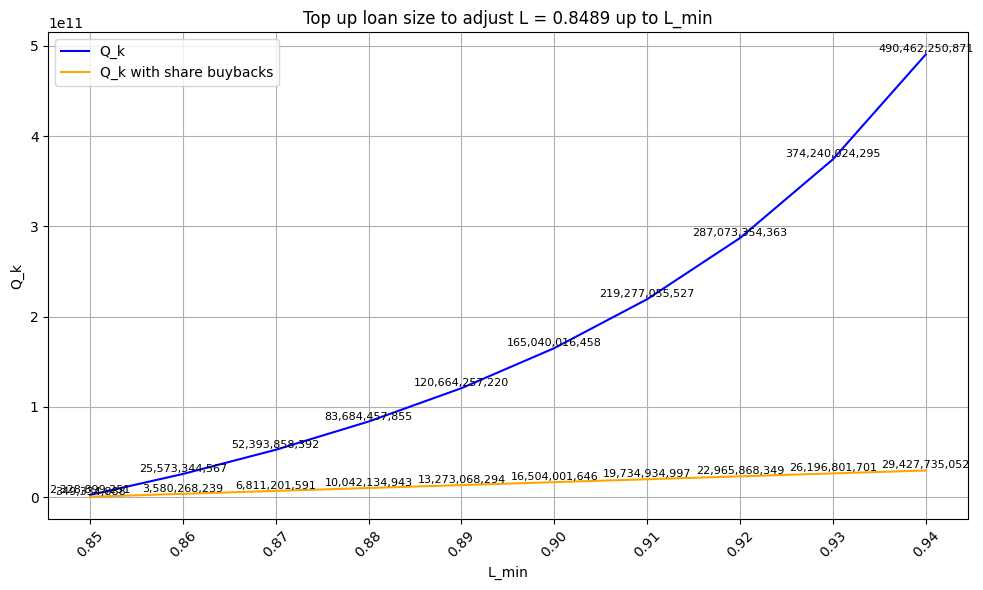

Q_k values:
L_min: 0.85, Q_k: 2,328,899,251.33
L_min: 0.86, Q_k: 25,573,344,566.57
L_min: 0.87, Q_k: 52,393,858,391.85
L_min: 0.88, Q_k: 83,684,457,854.67
L_min: 0.89, Q_k: 120,664,257,219.82
L_min: 0.90, Q_k: 165,040,016,458.00
L_min: 0.91, Q_k: 219,277,055,526.89
L_min: 0.92, Q_k: 287,073,354,363.00
L_min: 0.93, Q_k: 374,240,024,295.14
L_min: 0.94, Q_k: 490,462,250,871.33


In [9]:

import numpy as np
import matplotlib.pyplot as plt

total_debt =  274_280_000_000 
market_cap = 48_813_335_162
# Plot for different L_min, from 0 to 1 with 0.01 step
L_min = np.arange(0.85, .95, 0.01)
# L_min = 0.85

L = total_debt / (total_debt + market_cap)

# Additional loan size to adjust L up to L_min with top-up loan
Q_k = -total_debt + L_min * market_cap / (1 - L_min)

# print(f"Q_k: {Q_k:,.2f}")

# Additional loan size to adjust L up to L_min with to-up loan and share buybacks with the loan
Q_k_share_buybacks = L_min * (total_debt + market_cap) - total_debt
buyback_value = Q_k_share_buybacks

# print(f"Q_k with share buybacks: {Q_k_share_buybacks:,.2f}")
# print(f"Share buyback value (total value of equity drawdown): {Q_k_share_buybacks:,.2f}")

# Plotting

plt.figure(figsize=(10, 6))
plt.plot(L_min, Q_k, label='Q_k', color='blue')
plt.plot(L_min, Q_k_share_buybacks, label='Q_k with share buybacks', color='orange')

plt.title(f'Top up loan size to adjust L = {L:.4f} up to L_min')
plt.xlabel('L_min')
plt.ylabel('Q_k')
plt.grid()
# plt.axhline(0, color='black', lw=0.5, ls='--')
# plt.axvline(0, color='black', lw=0.5, ls='--')
# plt.axvline(1, color='black', lw=0.5, ls='--')
# Show values with 2 decimal points
plt.xticks(np.arange(0.85, .95, 0.01), rotation=45)
# Show values on the line
for i, j in zip(L_min, Q_k):
    plt.text(i, j, f'{j:,.0f}', fontsize=8, ha='center', va='bottom', rotation=0)
for i, j in zip(L_min, Q_k_share_buybacks):
    plt.text(i, j, f'{j:,.0f}', fontsize=8, ha='center', va='bottom', rotation=0)


plt.legend()
plt.tight_layout()
plt.savefig('images/Top up loan size to adjust L up to L_min.png', dpi=300, bbox_inches='tight')


plt.show()


print("Q_k values:")
for i in range(len(L_min)):
    print(f"L_min: {L_min[i]:.2f}, Q_k: {Q_k[i]:,.2f}")
